### Smoothening using frequency domain

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
# Load the image
image = cv2.imread("/content/rubick.jpeg", 0)

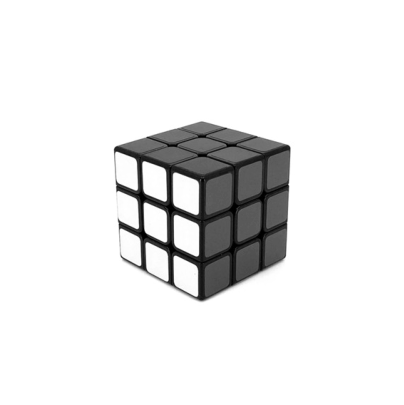

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# cinverting the image in frequncy domain
f = np.fft.fft2(image)
f_shifted = np.fft.fftshift(f)

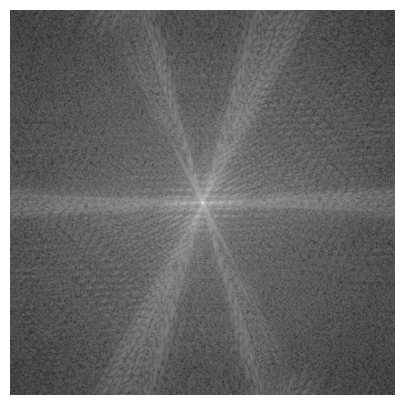

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(f_shifted)),cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Define the radius of the circular region to pass low frequencies
cutoff_radius = 50  # Adjust the value of cutoff_radius as needed

In [ ]:
# Create an ideal low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
low_pass_filter = np.zeros((rows, cols), np.uint8)
for i in range(rows):
    for j in range(cols):
        D_uv = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        if D_uv <= cutoff_radius:
            low_pass_filter[i, j] = 1
        else:
           low_pass_filter[i, j] = 0



In [ ]:
# Apply the filter in the frequency domain by element-wise multiplication
G = f_shifted * low_pass_filter

In [ ]:
# Perform the inverse Fourier Transform to obtain the filtered image
g = np.fft.ifftshift(G)
filtered_image = np.abs(np.fft.ifft2(g))
filtered_image = np.uint8(filtered_image)


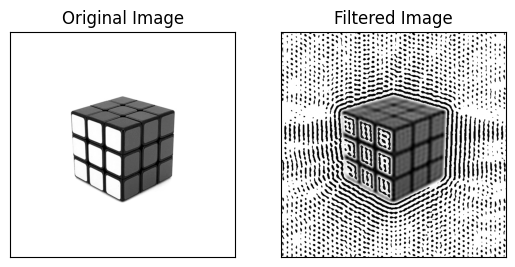

In [ ]:
# Display the original and filtered images
plt.subplot(121), plt.imshow(image, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_image, cmap="gray")
plt.title("Filtered Image"), plt.xticks([]), plt.yticks([])
plt.show()

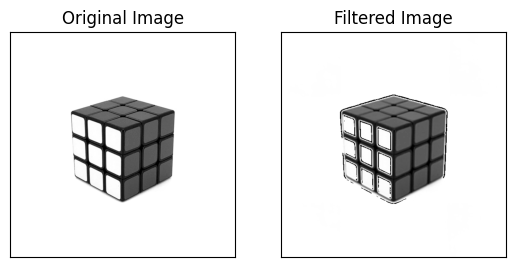

In [ ]:
# Compute the 2D Fourier Transform
f = np.fft.fft2(image)
f_shifted = np.fft.fftshift(f)

# Define the radius of the circular region for the Butterworth filter
cutoff_radius = 100 # Adjust the value of cutoff_radius as needed
order = 2  # Adjust the order of the Butterworth filter

# Create a Butterworth low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
butterworth_filter = np.zeros((rows, cols), np.float32)
for i in range(rows):
    for j in range(cols):
        D_uv = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        butterworth_filter[i, j] = 1 / (1 + (D_uv / cutoff_radius) ** (2 * order))

# Apply the filter in the frequency domain by element-wise multiplication
G = f_shifted * butterworth_filter

# Perform the inverse Fourier Transform to obtain the filtered image
g = np.fft.ifftshift(G)
filtered_image = np.abs(np.fft.ifft2(g))
filtered_image = np.uint8(filtered_image)

# Display the original and filtered images
plt.subplot(121), plt.imshow(image, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_image, cmap="gray")
plt.title("Filtered Image"), plt.xticks([]), plt.yticks([])
plt.show()


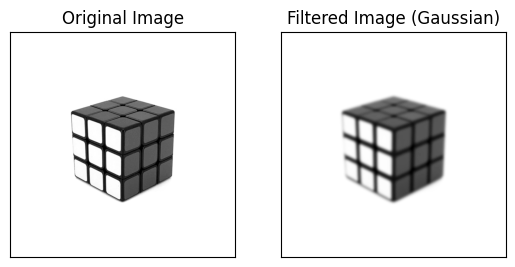

In [ ]:
# Define the standard deviation (sigma) for the Gaussian filter
sigma = 3  # Adjust the value of sigma as needed

# Apply the Gaussian filter using cv2.GaussianBlur
filtered_image = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma, sigmaY=sigma)

# Display the original and filtered images
plt.subplot(121), plt.imshow(image, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_image, cmap="gray")
plt.title("Filtered Image (Gaussian)"), plt.xticks([]), plt.yticks([])
plt.show()

### Sharpening using frequency domain


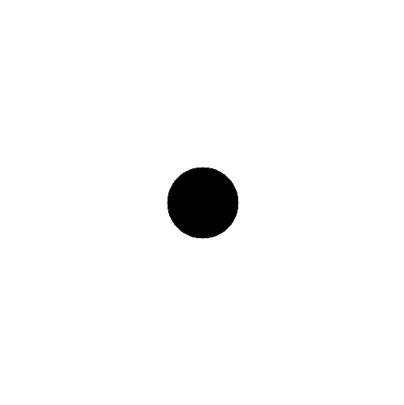

In [ ]:
# Gaussian: High pass filter
HPF = 1 - low_pass_filter

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

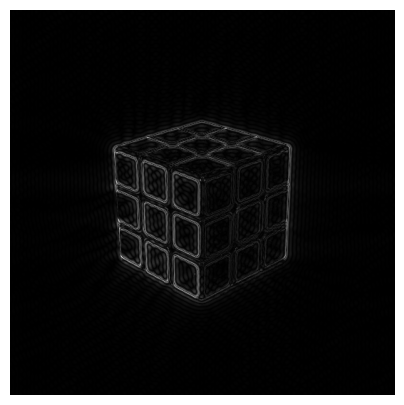

In [ ]:
# Image Filters
Gshift = f_shifted * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

###END